<center>
<strong><b><font size="5">Time Series 03 ~ Pendahuluan Darts Time Series Forecasting</font></b></strong>
<img alt="" src="images/covers/taudata-cover.jpg"/>
</center>

In [38]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab
    IN_COLAB = True
    !mkdir data models images
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Pedas-2024---Forecasting/master/data/international-airline-passengers.csv
    !pip install darts ipywidgets --q
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [39]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

seed = 404
np.random.seed(seed)
"Done"

'Done'

# <center>TimeSeries Data Types in Darts</center>

**TimeSeries: Kelas Data Utama dalam Darts**  

**TimeSeries** adalah kelas data utama dalam Darts yang merepresentasikan deret waktu univariat atau multivariat dengan indeks waktu yang terdefinisi dengan baik. Indeks waktu ini dapat berupa:  
- **pandas.DatetimeIndex**: Berisi nilai datetime.  
- **pandas.RangeIndex**: Berisi nilai integer, berguna untuk merepresentasikan data berurutan tanpa stempel waktu spesifik.  

Dalam beberapa kasus, **TimeSeries** bahkan dapat merepresentasikan deret probabilistik untuk, misalnya, mendapatkan interval kepercayaan.

### Fungsi dan Keunggulan TimeSeries di Darts:

1. **Konsistensi API untuk Deret Waktu**:  
   - **TimeSeries** dijamin memiliki indeks waktu yang tepat (berbasis integer atau datetime), lengkap, dan terurut berdasarkan waktu.
   
2. **Kompatibilitas Model**:  
   - Semua model dalam Darts menerima **TimeSeries** sebagai input dan menghasilkan **TimeSeries** sebagai output.

3. **Operasi Deret Waktu**:  
   - Memungkinkan berbagai operasi seperti membagi berdasarkan stempel waktu, menggabungkan (*concatenating*), dan lainnya.

4. **Kemudahan Representasi**:  
   - Menawarkan cara yang ramah pengguna untuk merepresentasikan deret multidimensi dan probabilistik (misalnya, memperoleh kuantil marginal).

5. **Penggunaan Jenis Data Khusus**:  
   - Dengan menggunakan tipe khusus seperti **TimeSeries** (bukan *DataFrame* Pandas atau array NumPy), Darts menghilangkan kebutuhan untuk bergantung pada konvensi format yang diharapkan oleh model dan fungsi yang berbeda.  

Hal ini memastikan efisiensi, kejelasan, dan konsistensi dalam pengelolaan dan analisis deret waktu.

* https://unit8co.github.io/darts/generated_api/darts.timeseries.html

In [40]:
from darts import TimeSeries

df = pd.read_csv('data/international-airline-passengers.csv')
df.head()

,year,passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [41]:
series = TimeSeries.from_dataframe(df, 'year', 'passengers')
series

<TimeSeries (DataArray) (year: 144, component: 1, sample: 1)> Size: 1kB
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * year       (year) datetime64[ns] 1kB 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object 8B 'passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [42]:
series = AirPassengersDataset().load()
type(series)

darts.timeseries.TimeSeries

In [43]:
series[-8:-1]

<TimeSeries (DataArray) (Month: 7, component: 1, sample: 1)> Size: 56B
array([[[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 56B 1960-05-01 1960-06-01 ... 1960-11-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [44]:
series.time_index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

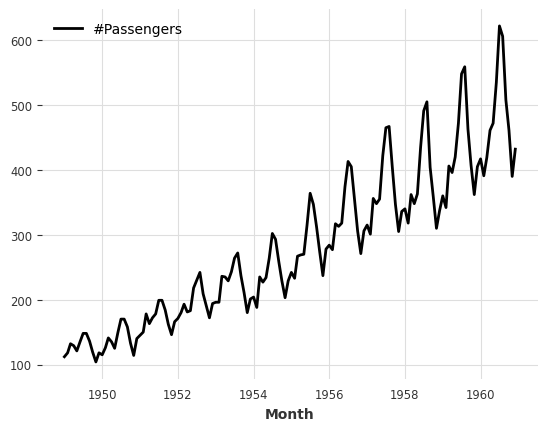

In [45]:
series.plot().figure
plt.show()

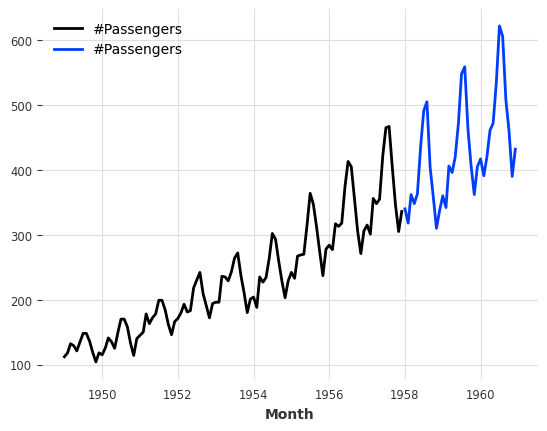

In [46]:
series1, series2 = series.split_after(0.75)
series1.plot().figure
series2.plot().figure
#series.plot().figure
plt.show()

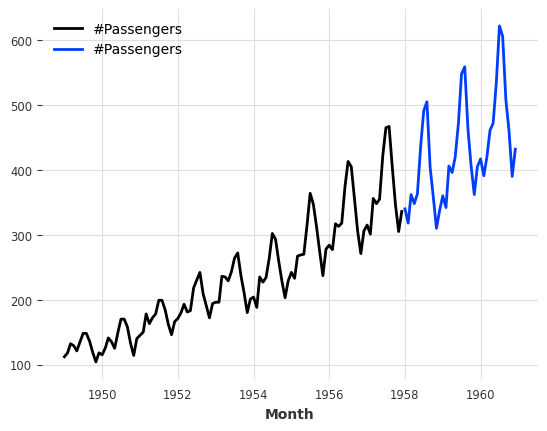

In [47]:
series1, series2 = series[:-36], series[-36:]
series1.plot().figure
series2.plot().figure
plt.show()

# Spllit after time

In [48]:
from darts import models

print(dir(models))

['ARIMA', 'AutoARIMA', 'BATS', 'BlockRNNModel', 'CatBoostModel', 'Croston', 'DLinearModel', 'EnsembleModel', 'ExponentialSmoothing', 'FFT', 'FourTheta', 'GaussianProcessFilter', 'GlobalNaiveAggregate', 'GlobalNaiveDrift', 'GlobalNaiveSeasonal', 'KalmanFilter', 'KalmanForecaster', 'LightGBMModel', 'LinearRegressionModel', 'MovingAverageFilter', 'NBEATSModel', 'NHiTSModel', 'NLinearModel', 'NaiveDrift', 'NaiveEnsembleModel', 'NaiveMean', 'NaiveMovingAverage', 'NaiveSeasonal', 'NotImportedModule', 'Prophet', 'RNNModel', 'RandomForest', 'RegressionEnsembleModel', 'RegressionModel', 'StatsForecastAutoARIMA', 'StatsForecastAutoCES', 'StatsForecastAutoETS', 'StatsForecastAutoTheta', 'TBATS', 'TCNModel', 'TFTModel', 'TSMixerModel', 'Theta', 'TiDEModel', 'TransformerModel', 'VARIMA', 'XGBModel', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'components', 'filtering', 'forecasting', 'get_logger', 'logger', 'utils'

In [49]:
from darts.models import ExponentialSmoothing

train, val = series.split_before(pd.Timestamp('19580101'))

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))
prediction[:5]

<TimeSeries (DataArray) (Month: 5, component: 1, sample: 1)> Size: 40B
array([[[357.33210676]],

       [[345.81985123]],

       [[398.63418043]],

       [[390.19155757]],

       [[396.3458985 ]]])
Coordinates:
  * Month      (Month) datetime64[ns] 40B 1958-01-01 1958-02-01 ... 1958-05-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

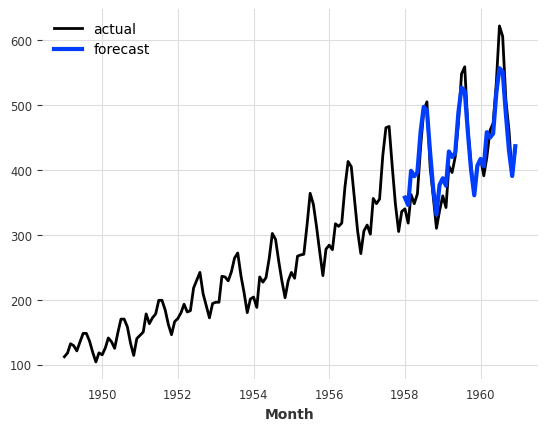

In [50]:
series.plot(label='actual').figure
prediction.plot(label='forecast', lw=3).figure
plt.legend()
plt.show()

# Resampling Time Index

In [51]:
times = pd.date_range(start=pd.Timestamp("20200101233000"), periods=6, freq="15min")
pd_series = pd.Series(range(6), index=times)
ts = TimeSeries.from_series(pd_series)
print(ts.time_index)

DatetimeIndex(['2020-01-01 23:30:00', '2020-01-01 23:45:00',
               '2020-01-02 00:00:00', '2020-01-02 00:15:00',
               '2020-01-02 00:30:00', '2020-01-02 00:45:00'],
              dtype='datetime64[ns]', name='time', freq='15min')


In [52]:
resampled_nokwargs_ts = ts.resample(freq="1h")
print(resampled_nokwargs_ts.time_index)

DatetimeIndex(['2020-01-01 23:00:00', '2020-01-02 00:00:00'], dtype='datetime64[ns]', name='time', freq='h')


# Mapping Function

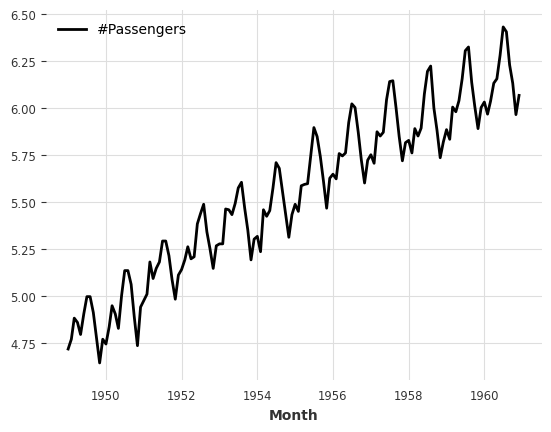

In [53]:
series.map(np.log).plot().figure
plt.show()

# Binary Holiday Components

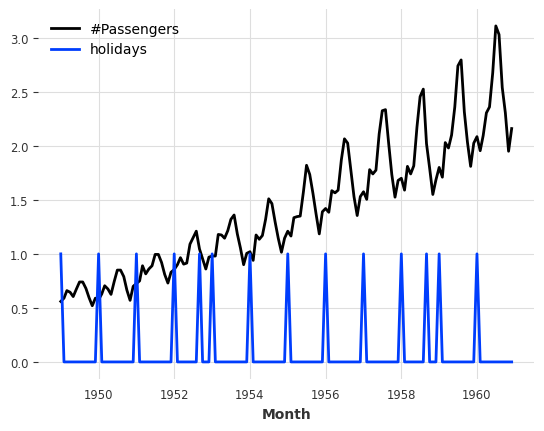

In [54]:
(series / 200).add_holidays("US").plot().figure
plt.show()

# Differencing

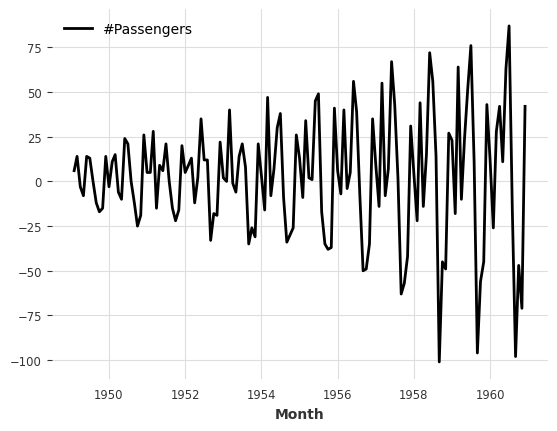

In [55]:
series.diff().plot().figure
plt.show()

# Missing Values

In [56]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(50, step=0.5)
values

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5])

In [57]:
values[10:30] = np.nan # None
values[60:95] = np.nan
values

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan, 47.5, 48. , 48.5, 49. ,
       49.5])

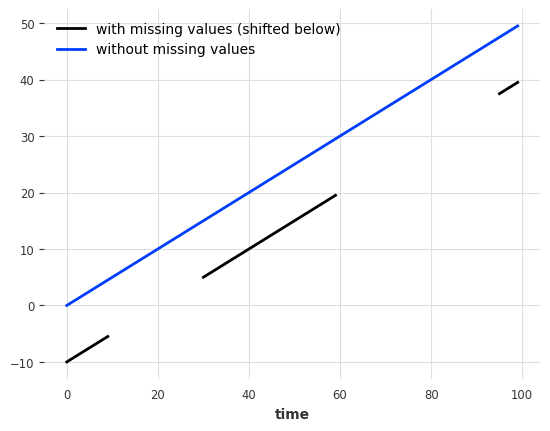

In [58]:
series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label="with missing values (shifted below)").figure
fill_missing_values(series_).plot(label="without missing values").figure
plt.show()

# Contoh Lain:

* https://unit8co.github.io/darts/generated_api/darts.dataprocessing.transformers.missing_values_filler.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [59]:
import numpy as np
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
values = np.arange(start=0, stop=1, step=0.1)
values[5:8] = np.nan
values

array([0. , 0.1, 0.2, 0.3, 0.4, nan, nan, nan, 0.8, 0.9])

In [60]:
series = TimeSeries.from_values(values)
transformer = MissingValuesFiller()
series_filled = transformer.transform(series)
print(series_filled)

<TimeSeries (DataArray) (time: 10, component: 1, sample: 1)> Size: 80B
array([[[0. ]],

       [[0.1]],

       [[0.2]],

       [[0.3]],

       [[0.4]],

       [[0.5]],

       [[0.6]],

       [[0.7]],

       [[0.8]],

       [[0.9]]])
Coordinates:
  * time       (time) int64 80B 0 1 2 3 4 5 6 7 8 9
  * component  (component) object 8B '0'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


# Creating a training and validation series

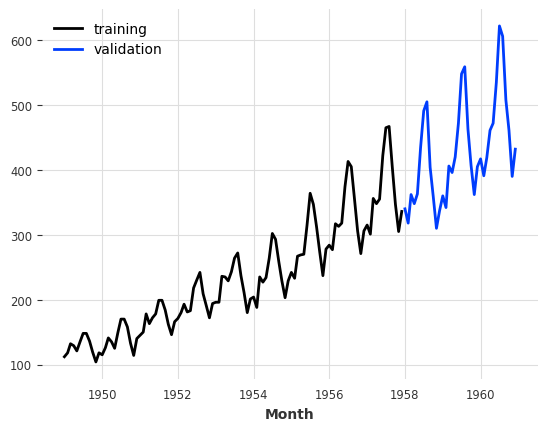

In [61]:
series = AirPassengersDataset().load()

train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training").figure
val.plot(label="validation").figure
plt.show()

# Baseline - Naive Forecast

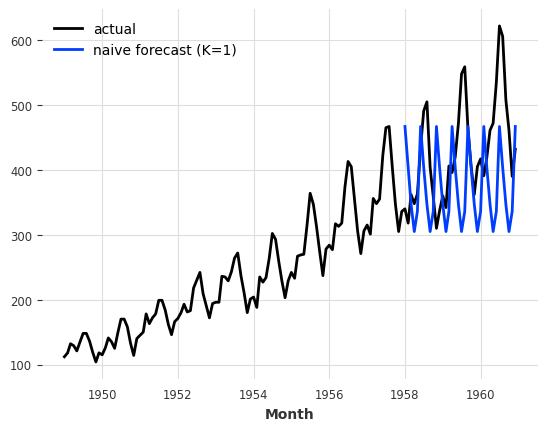

In [62]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=5)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual").figure
naive_forecast.plot(label="naive forecast (K=1)").figure
plt.show()

# Inspect Seasonality

* Highlite m=12

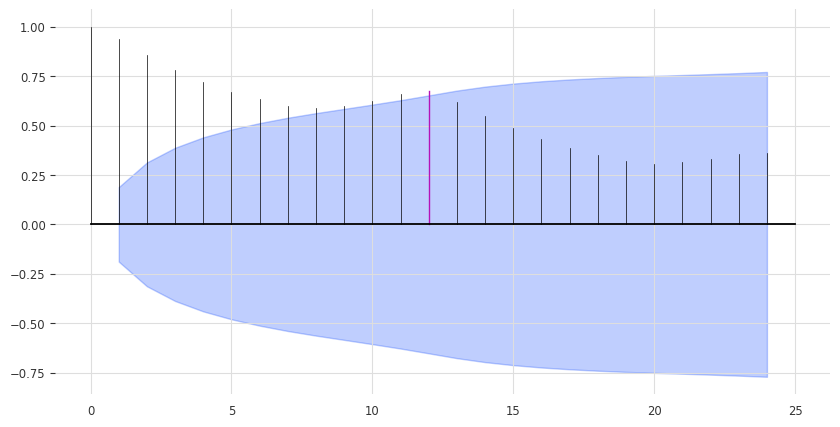

In [63]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05, max_lag=24)
plt.show()

In [64]:
# Check tiap m
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 12.


# Naive Seasonal Model

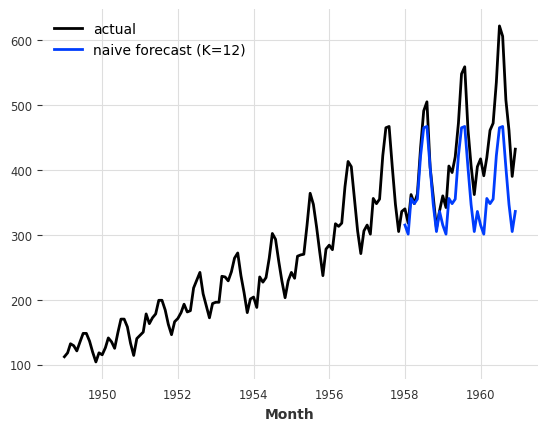

In [65]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual").figure
seasonal_forecast.plot(label="naive forecast (K=12)").figure
plt.show()

# Naive Seasonal + Drift

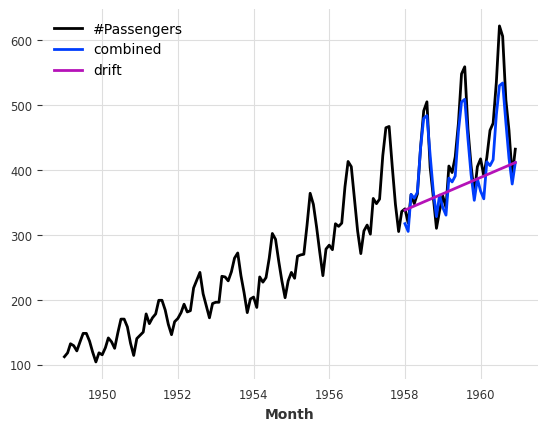

In [66]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined").figure
drift_forecast.plot(label="drift").figure
plt.show()

# Dasar Pemodelan Model di Darts

* Sama seperti Scikit-Learn
* init, fit, predict

In [67]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)            # init
naive_model.fit(train)                      # fit
naive_forecast = naive_model.predict(n=36)  # predict
naive_forecast[:3]

<TimeSeries (DataArray) (Month: 3, component: 1, sample: 1)> Size: 24B
array([[[336.]],

       [[336.]],

       [[336.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 24B 1958-01-01 1958-02-01 1958-03-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# Evaluation

* https://unit8co.github.io/darts/generated_api/darts.metrics.metrics.html?highlight=metrics

In [68]:
from darts.metrics import mape

print(
    f"Mean absolute percentage error for the combined naive drift + seasonal: {mape(series, combined_forecast):.2f}%."
)

Mean absolute percentage error for the combined naive drift + seasonal: 5.66%.


In [69]:
from darts import metrics

print(dir(metrics))

['TIME_DEPENDENT_METRICS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'ae', 'ape', 'arre', 'ase', 'coefficient_of_variation', 'dtw_metric', 'err', 'iw', 'mae', 'mape', 'marre', 'mase', 'merr', 'metrics', 'miw', 'mql', 'mse', 'msse', 'ope', 'ql', 'qr', 'r2_score', 'rmse', 'rmsle', 'rmsse', 'sape', 'se', 'sle', 'smape', 'sse']


# Model Selection made easy with darts

* https://unit8co.github.io/darts/README.html
<center><img alt="" src="images/timeseries/darts-models.png"/></center>

In [70]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print(f"model {model} obtains MAPE: {mape(val, forecast):.2f}%")


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 5.11%
model TBATS() obtains MAPE: 5.87%
model AutoARIMA() obtains MAPE: 11.65%
model Theta() obtains MAPE: 8.15%


# Optimal (Parameter) Model

In [71]:
2 - np.linspace(-10, 10, 50)

array([12.        , 11.59183673, 11.18367347, 10.7755102 , 10.36734694,
        9.95918367,  9.55102041,  9.14285714,  8.73469388,  8.32653061,
        7.91836735,  7.51020408,  7.10204082,  6.69387755,  6.28571429,
        5.87755102,  5.46938776,  5.06122449,  4.65306122,  4.24489796,
        3.83673469,  3.42857143,  3.02040816,  2.6122449 ,  2.20408163,
        1.79591837,  1.3877551 ,  0.97959184,  0.57142857,  0.16326531,
       -0.24489796, -0.65306122, -1.06122449, -1.46938776, -1.87755102,
       -2.28571429, -2.69387755, -3.10204082, -3.51020408, -3.91836735,
       -4.32653061, -4.73469388, -5.14285714, -5.55102041, -5.95918367,
       -6.36734694, -6.7755102 , -7.18367347, -7.59183673, -8.        ])

In [72]:
# Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in tqdm(thetas):
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.55it/s]


In [73]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(f"Lowest MAPE is: {mape(val, pred_best_theta):.2f}, with theta = {best_theta}.")

Lowest MAPE is: 4.40, with theta = -3.5102040816326543.


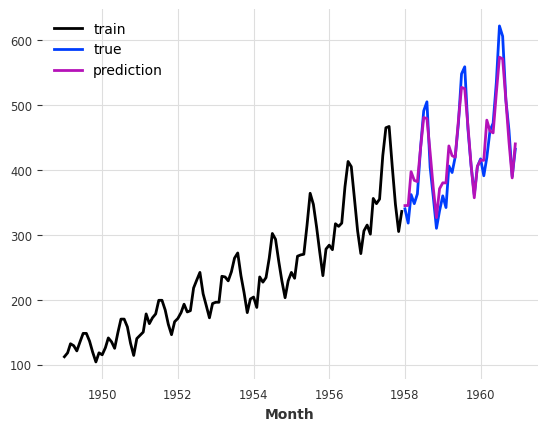

In [74]:
train.plot(label="train").figure
val.plot(label="true").figure
pred_best_theta.plot(label="prediction").figure
plt.show()

# Saving and Loading Models


In [75]:
best_theta_model.save("my_model.pkl")
model_loaded = Theta.load("my_model.pkl")
"lihat file .pkl baru di PWD"

'lihat file .pkl baru di PWD'

# Cross Validasi di Time Series:
# **Pengujian Ulang (*Backtesting*): Simulasi Peramalan Historis**  
Saat ini, kita memiliki model yang berkinerja baik pada set validasi, dan itu merupakan hasil yang baik. Namun, bagaimana kita dapat mengetahui kinerja yang mungkin kita peroleh jika kita telah menggunakan model ini secara historis?

*Backtesting* mensimulasikan prediksi yang akan diperoleh secara historis dengan model tertentu. Proses ini dapat memakan waktu, karena model (secara default) dilatih ulang setiap kali waktu prediksi simulasi maju.

Prediksi simulasi semacam ini selalu didefinisikan dalam kaitannya dengan *forecast horizon*, yaitu jumlah langkah waktu yang memisahkan waktu prediksi dari waktu peramalan. Dalam contoh berikut, kita mensimulasikan peramalan untuk 3 bulan ke depan (dibandingkan dengan waktu prediksi). Hasil dari pemanggilan fungsi `historical_forecasts()` (secara default) adalah sebuah *TimeSeries* yang hanya berisi nilai prediksi terakhir dari masing-masing peramalan untuk 3 bulan ke depan tersebut.

<center><img alt="" src="images/timeseries/timeSeries-CV.png"/></center>
<center><img alt="" src="images/timeseries/timeseries-cv-shift.gif"/></center>

  0%|          | 0/58 [00:00<?, ?it/s]

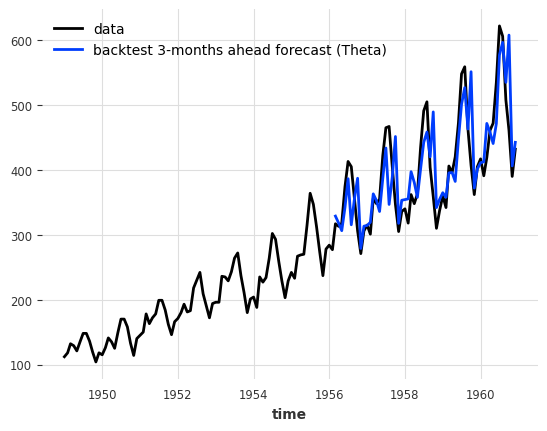

MAPE = 7.99%


In [76]:
from ipywidgets import FloatProgress
hfc_params = {
    "series": series,
    "start": pd.Timestamp("1956-01-01"),  # can also be a float for the fraction of the series to start at
    "forecast_horizon": 3,
    "verbose": True,
}
historical_fcast_theta = best_theta_model.historical_forecasts(last_points_only=True, **hfc_params)
# conda install -c conda-forge ipywidgets 
# jika ada error terkait ipywidgets
series.plot(label="data").figure
historical_fcast_theta.plot(label="backtest 3-months ahead forecast (Theta)").figure
plt.show()
print(f"MAPE = {mape(series, historical_fcast_theta):.2f}%")

In [77]:
hfc_precomputed = best_theta_model.historical_forecasts(last_points_only=False, stride=1, **hfc_params)
new_error = best_theta_model.backtest(historical_forecasts=hfc_precomputed, last_points_only=False, stride=1, **hfc_params)

print(f"Average error (MAPE) over all historical forecasts: {new_error:.2f}")

  0%|          | 0/58 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 6.30


  0%|          | 0/58 [00:00<?, ?it/s]

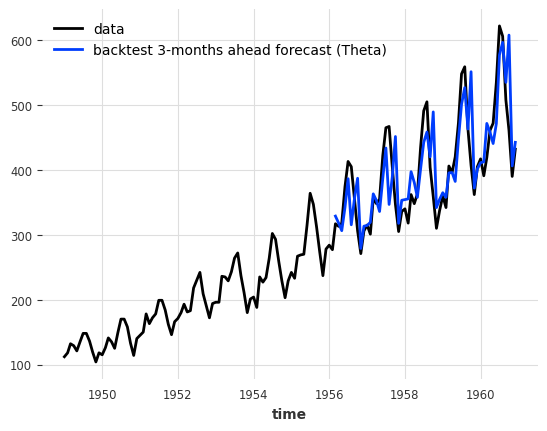

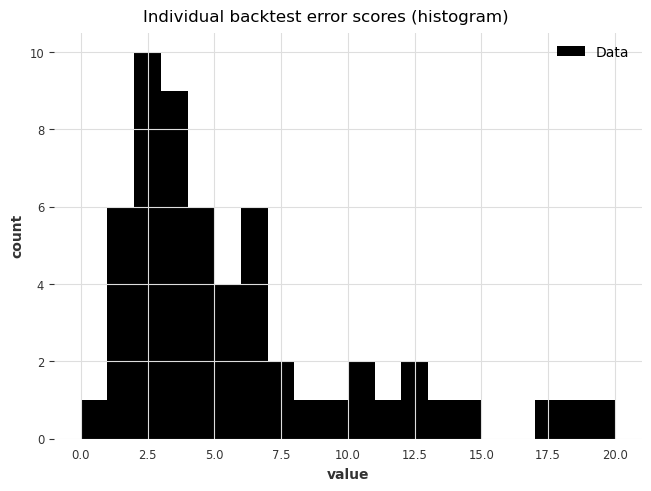

In [40]:
best_theta_model = Theta(best_theta)

raw_errors = best_theta_model.backtest(metric=mape, reduction=None, last_points_only=False, stride=1, **hfc_params)

from darts.utils.statistics import plot_hist

plot_hist(raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Individual backtest error scores (histogram)",)
plt.show()

# Assumptions

<img alt="" src="images/timeseries/tsa-Assumptions.jpg"/>

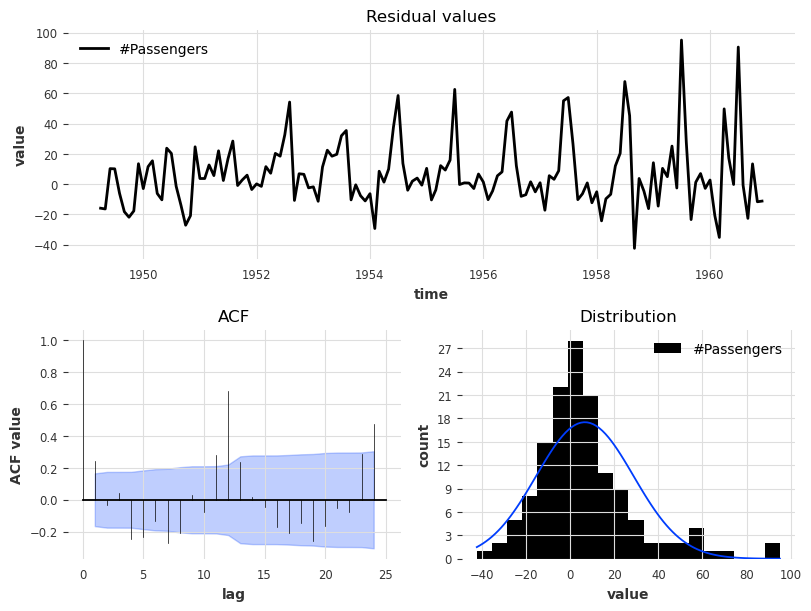

In [41]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(best_theta_model.residuals(series))
plt.show()